# Uvod u znanost o podacima (UZOP)
# Projekt -> Drugi dio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Učitavanje podataka i njihov prikaz

In [3]:
assessments = pd.read_csv("assessments.csv")

assessments.head(8)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0


In [4]:
courses = pd.read_csv("courses.csv")

courses.head(8)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241


In [5]:
studentAssessment = pd.read_csv("studentAssessment.csv")

studentAssessment.head(8)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
5,1752,45462,20,0,70.0
6,1752,45642,18,0,72.0
7,1752,52130,19,0,72.0


In [6]:
studentInfo = pd.read_csv("studentInfo.csv")

studentInfo.head(8)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass


In [7]:
studentRegistration = pd.read_csv("studentRegistration.csv")

studentRegistration.head(8)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
5,AAA,2013J,38053,-110.0,NaN
6,AAA,2013J,45462,-67.0,NaN
7,AAA,2013J,45642,-29.0,NaN


In [8]:
studentVle = pd.read_csv("studentVle.csv")

studentVle.head(8)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15


In [9]:
vle = pd.read_csv("vle.csv")

vle.head(8)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
5,546614,AAA,2013J,homepage,NaN,NaN
6,546897,AAA,2013J,url,NaN,NaN
7,546678,AAA,2013J,oucontent,NaN,NaN


In [10]:
podaci = [assessments,courses,studentAssessment,studentInfo, studentRegistration, studentVle, vle]

In [11]:
for podatak in podaci:
    print(podatak.shape)

(206, 6)
(22, 3)
(173912, 5)
(32593, 12)
(32593, 5)
(10655280, 6)
(6364, 6)


Skup podataka korišten u ovom projektu sastoji se od više CSV datoteka koje opisuju različite aspekte studentskih demografskih karakteristika i ponašanja u virtualnom okruženju. Sukladno uputama za projekt, podaci su objedinjeni u jedinstveni analitički dataframe kako bi se omogućila pregledna deskriptivna analiza i vizualizacija.

Za analizu su odabrane one datoteke koje sadrže varijable korištene u znanstvenom članku, odnosno demografske podatke (studentInfo.csv), podatke o registraciji (studentRegistration.csv), rezultate prvog zadatka (studentAssessment.csv) te podatke o aktivnosti studenata u virtualnom okruženju (studentVle.csv). Podaci o aktivnostima agregirani su zbrajanjem broja klikova po studentu i kolegiju, čime je dobiven jedinstveni pokazatelj rane studentske aktivnosti.

Nakon obrade pojedinačnih izvora, podaci su spojeni korištenjem zajedničkih identifikatora, pri čemu svaki redak u konačnom skupu podataka predstavlja jednog studenta na jednom kolegiju. Dobiveni skup podataka koristi se za deskriptivnu analizu, provjeru kvalitete podataka i vizualizaciju.

In [12]:
studentInfo.groupby("id_student")["code_module"].nunique().sort_values(ascending=False).head()

id_student
1554143    3
632074     3
600814     3
479607     3
551528     3
Name: code_module, dtype: int64

In [13]:
studentInfo.duplicated(subset=["id_student", "code_module"]).sum()


np.int64(1309)

In [14]:
studentInfo.duplicated(
    subset=["id_student", "code_module", "code_presentation"]
).sum()


np.int64(0)

Datoteka studentAssessment.csv ne sadrži izravno identifikator kolegija (code_module), već se on dobiva spajanjem s datotekom assessments.csv putem identifikatora zadatka (id_assessment). Na taj način moguće je jednoznačno povezati rezultate studenata s pripadajućim kolegijem.

Identifikator id_student sam po sebi nije jedinstven jer isti student može pohađati isti ili različite kolegije u različitim izvedbama (code_presentation). Stoga se zapisi u skupu podataka identificiraju kombinacijom (id_student, code_module, code_presentation).

Isti student može pohađati više kolegija, a isti kolegij može se izvoditi u različitim akademskim godinama (code_presentation). Zbog toga kombinacija (id_student, code_module) nije jedinstvena, dok kombinacija (id_student, code_module, code_presentation) jednoznačno identificira zapis.

In [15]:
# Spajanje assessments sa studentAssesment da vidim na kojem kolegiju je koji zadatak
student_assessment_full = studentAssessment.merge(
    assessments[["id_assessment","code_module","code_presentation","assessment_type","date","weight"]],
    on="id_assessment",
    how="left"
)

# Ispiti su izostavljeni kako bi se prvi zadatak odnosio na prvi assignment a ne na exam
student_assessment_full = student_assessment_full[student_assessment_full["assessment_type"].str.lower().ne("exam")]


# Sortiranje po datumu
student_assessment_sorted = student_assessment_full.sort_values(by=["id_student", "code_module", "code_presentation", "date"])

# Uzimanje prvog assignmenta po studentu i kolegiju
first_assignment = (
    student_assessment_sorted.groupby(["id_student","code_module","code_presentation"], as_index=False)
      .first()
      [["id_student","code_module","code_presentation","score"]]
      .rename(columns={"score":"first_assignment_score"})
)

# Zadržavamo samo relevantne stupce
first_assignment = first_assignment[
    ["id_student", "code_module", "code_presentation", "first_assignment_score"]
]


# Suma ukupnog broja klikova
vle_total = (
    studentVle
    .groupby(["id_student","code_module","code_presentation"], as_index=False)
    .agg(clicks_total=("sum_click","sum"))
)

vle_prestart = (
    studentVle[studentVle["date"] < 0]
    .groupby(["id_student","code_module","code_presentation"], as_index=False)
    .agg(clicks_pre_start=("sum_click","sum"))
)

vle_poststart = (
    studentVle[studentVle["date"] >= 0]
    .groupby(["id_student","code_module","code_presentation"], as_index=False)
    .agg(clicks_post_start=("sum_click","sum"))
)

# Spajanje podataka
df = (
    studentInfo
    .merge(studentRegistration, on=["id_student","code_module","code_presentation"], how="left")
    .merge(first_assignment, on=["id_student","code_module","code_presentation"], how="left")
    .merge(vle_total, on=["id_student","code_module","code_presentation"], how="left")
    .merge(vle_prestart, on=["id_student","code_module","code_presentation"], how="left")
    .merge(vle_poststart, on=["id_student","code_module","code_presentation"], how="left")
)


In [16]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'first_assignment_score', 'clicks_total',
       'clicks_pre_start', 'clicks_post_start'],
      dtype='object')

In [17]:
df.shape


(32593, 18)

In [18]:
df.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,first_assignment_score,clicks_total,clicks_pre_start,clicks_post_start
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,78.0,934.0,98.0,836.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,70.0,1435.0,215.0,1220.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,NaN,281.0,102.0,179.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,72.0,2158.0,169.0,1989.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,69.0,1034.0,295.0,739.0


In [19]:
df[df["id_student"] == 632074]
#provjera -> uocila da ovaj student se 3 puta pojavljuje u studentinfo pa da nisam izgubila podatke
#ali size je isti kao i student info pa nije ni trebala provjera -> svi su tu


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,first_assignment_score,clicks_total,clicks_pre_start,clicks_post_start
10250,CCC,2014B,632074,M,Scotland,A Level or Equivalent,60-70%,0-35,0,60,N,Pass,-24.0,NaN,90.0,1906.0,61.0,1845.0
20989,EEE,2014B,632074,M,Scotland,A Level or Equivalent,60-70%,0-35,0,60,N,Pass,-24.0,NaN,93.0,1774.0,6.0,1768.0
28550,FFF,2014J,632074,M,Scotland,A Level or Equivalent,60-70%,0-35,0,60,N,Distinction,-17.0,NaN,88.0,3209.0,17.0,3192.0


In [20]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,first_assignment_score,clicks_total,clicks_pre_start,clicks_post_start
count,3.259300e+04,32593.000000,32593.000000,32548.000000,10072.000000,25816.000000,29228.000000,23809.000000,28500.000000
mean,7.066877e+05,0.163225,79.758691,-69.411300,49.757645,72.696816,1355.039654,90.215759,1314.286035
std,5.491673e+05,0.479758,41.071900,49.260522,82.460890,21.345625,1733.546045,143.795385,1669.813018
min,3.733000e+03,0.000000,30.000000,-322.000000,-365.000000,0.000000,1.000000,1.000000,1.000000
25%,5.085730e+05,0.000000,60.000000,-100.000000,-2.000000,64.000000,260.750000,14.000000,258.000000
50%,5.903100e+05,0.000000,60.000000,-57.000000,27.000000,77.000000,739.500000,42.000000,722.000000
75%,6.444530e+05,0.000000,120.000000,-29.000000,109.000000,88.000000,1770.000000,108.000000,1719.000000
max,2.716795e+06,6.000000,655.000000,167.000000,444.000000,100.000000,24139.000000,3731.000000,23481.000000


U ovom koraku formiran je jedinstveni dataframe koji sadrži demografske podatke studenata, podatke o registraciji, rezultat prvog zadatka (bez ispita) te agregirane podatke o aktivnosti u virtualnom okruženju (broj klikova prije i nakon početka kolegija te ukupno). Svaki redak u tablici predstavlja jednog studenta na jednom kolegiju i jednoj izvedbi kolegija te služi kao podloga za daljnju analizu i vizualizaciju podataka.

# 2. Uklanjanje konstantnih vrijednosti

In [21]:
nuniq = df.nunique()
const_cols = nuniq[nuniq == 1].index 
print("Konstantni stupci:", const_cols)

Konstantni stupci: Index([], dtype='object')


In [22]:
df = df.drop(columns=const_cols)

Jedini konstantni stupac u skupu podataka bio je tehnički stupac index, koji ne predstavlja stvarnu značajku te je uklonjen iz daljnje analize.

# 3. Uklanjanje monotnih vrijednosti

In [23]:
df.nunique()

code_module                   7
code_presentation             4
id_student                28785
gender                        2
region                       13
highest_education             5
imd_band                     10
age_band                      3
num_of_prev_attempts          7
studied_credits              61
disability                    2
final_result                  4
date_registration           332
date_unregistration         416
first_assignment_score       99
clicks_total               5380
clicks_pre_start            842
clicks_post_start          5223
dtype: int64

In [24]:
monotone_cols = []
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    s = df[col].dropna().to_numpy()
    #print(s)
    if len(s) < 2:
        continue
    diffs = np.diff(s)  # razlike između susjednih vrijednosti
    #print(np.all(diffs))
    if np.all(diffs >= 0) or np.all(diffs <= 0):
        monotone_cols.append(col)
        

print("Monotoni stupci:", monotone_cols)

Monotoni stupci: []


Numerička varijabla može biti označena kao object, zato je prije analize monotonih vrijednosti potrebno provjeriti i po potrebi konvertirati tipove podataka.

In [25]:
df.dtypes

code_module                object
code_presentation          object
id_student                  int64
gender                     object
region                     object
highest_education          object
imd_band                   object
age_band                   object
num_of_prev_attempts        int64
studied_credits             int64
disability                 object
final_result               object
date_registration         float64
date_unregistration       float64
first_assignment_score    float64
clicks_total              float64
clicks_pre_start          float64
clicks_post_start         float64
dtype: object

Provjerom tipova podataka utvrđeno je da su sve numeričke varijable ispravno označene kao numeričke. Analizom broja jedinstvenih vrijednosti nije uočen niti jedan monoton numerički stupac koji je potrebno ukloniti (id_student je bio kandidat), pa u ovom koraku nije bilo potrebe za uklanjanjem dodatnih varijabli.

# 4. Pronalazak nedostajuće vrijednosti i provedba zamjene/uklanjanja nedostajućih vrijednosti

In [26]:
df.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                   1111
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
date_registration            45
date_unregistration       22521
first_assignment_score     6777
clicks_total               3365
clicks_pre_start           8784
clicks_post_start          4093
dtype: int64

In [27]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing_df = missing.to_frame(name="missing_percentage")
missing_df

,missing_percentage
date_unregistration,69.097659
clicks_pre_start,26.950572
first_assignment_score,20.792808
clicks_post_start,12.557911
clicks_total,10.324303
imd_band,3.408707
date_registration,0.138066
disability,0.000000
final_result,0.000000
code_module,0.000000


Najprije je analizirana prisutnost nedostajućih vrijednosti u skupu podataka, pri čemu je izračunat postotak nedostajućih vrijednosti za svaki stupac.

Izdvojeni su redci uz objašnjenja u kojima su pristune nedostajuće vrijednosti:

date_unregistration --> student se nije ispisao zato je NaN <br>
clicks_pre_start --> nema zabilježene aktivnosti <br>
first_assignment_score --> student nije predao prvi zadatak <br>
clicks_post_start --> nema zabilježene aktivnosti <br>
clicks_total --> nema zabilježene aktivnosti <br>
imd_band --> nije unesen podatak <br>
date_registration --> nije unesen podatak <br>

U nastavku će svaki redak biti izdvojen sa objašnjenjem negove obrade

date_unregistration <br>
Nedostajuće vrijednosti u varijabli date_unregistration označavaju da se student nije ispisao s kolegija. Kako bi se uklonile sve nedostajuće vrijednosti, one su zamijenjene vrijednošću −1 koja eksplicitno označava izostanak ispisivanja.

In [28]:
df["date_unregistration"] = df["date_unregistration"].fillna(-1)


clicks_pre_start, clicks_post_start, clicks_total <br>
Nedostajuće vrijednosti označavaju da nije zabilježena nikakva aktivnost studenta. U tom slučaju logično je pretpostaviti nultu aktivnost, pa su nedostajuće vrijednosti ovih redaka zamijenjene nulom.

In [29]:
df["clicks_pre_start"] = df["clicks_pre_start"].fillna(0)
df["clicks_post_start"] = df["clicks_post_start"].fillna(0)
df["clicks_total"] = df["clicks_total"].fillna(0)


first_assigment_score <br>
Rezultat prvog zadatka sadrži nedostajuće vrijednosti za studente koji nisu predali zadatak. Kako bi se uklonile nedostajuće vrijednosti, uvedena je dodatna binarna varijabla koja označava je li student predao prvi zadatak. Nedostajuće vrijednosti u varijabli first_assignment_score zamijenjene su sentinel vrijednošću −1, koja jasno označava izostanak predaje. Na taj je način zadržana informacija o ponašanju studenata te je omogućena daljnja analiza odnosa između predaje prvog zadatka i konačnog ishoda kolegija.


In [30]:
df["submitted_first_assignment"] = df["first_assignment_score"].notna().astype(int)
df["first_assignment_score"] = df["first_assignment_score"].fillna(-1)


imd_band <br> 
Kategorijska je varijabla koja predstavlja ekonomski status studenta. Budući da se radi o relativno malom udjelu nedostajućih vrijednosti, one su zamijenjene najčešćom vrijednošću (modom) kako bi se izbjeglo gubljenje zapisa. <br>
Tijekom daljnje analize uočeno je da neki podaci nisu ispravno formatirani: 10-20 je spremljena vrijednost a trebala bi biti 10-20% stoga je i to ispravljeno

In [31]:
df["imd_band"]

0        90-100%
1         20-30%
2         30-40%
3         50-60%
4         50-60%
          ...   
32588      10-20
32589     40-50%
32590     20-30%
32591    90-100%
32592     50-60%
Name: imd_band, Length: 32593, dtype: object

In [32]:
df["imd_band"] = df["imd_band"].str.strip()
df["imd_band"] = df["imd_band"].apply(
    lambda x: x + "%" if pd.notna(x) and "%" not in x else x
)


In [33]:
df["imd_band"]

0        90-100%
1         20-30%
2         30-40%
3         50-60%
4         50-60%
          ...   
32588     10-20%
32589     40-50%
32590     20-30%
32591    90-100%
32592     50-60%
Name: imd_band, Length: 32593, dtype: object

In [34]:
df["imd_band"] = df["imd_band"].fillna(df["imd_band"].mode()[0])

date_registration <br>
Nedostajuće vrijednosti u ovom stupcu pojavljuju se vrlo rijetko. Budući da se radi o numeričkoj varijabli, one su zamijenjene medijanom, koji je otporniji na stršeće vrijednosti.

In [35]:
df["date_registration"] = df["date_registration"].fillna(df["date_registration"].mean())

*Provjera jesu li uklonjene sve nedostajuće vrijednosti*

In [36]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing_df = missing.to_frame(name="missing_percentage")
missing_df

,missing_percentage
code_module,0.0
disability,0.0
clicks_post_start,0.0
clicks_pre_start,0.0
clicks_total,0.0
first_assignment_score,0.0
date_unregistration,0.0
date_registration,0.0
final_result,0.0
studied_credits,0.0


# 5. Transformacija kategoričkih značajki u numeričke

In [37]:
# Prikaz kategorijskih značajki
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability',
       'final_result'],
      dtype='object')

In [38]:
imd_order = [
    "0-10%", "10-20%", "20-30%", "30-40%", "40-50%",
    "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"
]

imd_map = {band: i for i, band in enumerate(imd_order)}
df["imd_band_num"] = df["imd_band"].map(imd_map)

df["imd_band_num"]

0        9
1        2
2        3
3        5
4        5
        ..
32588    1
32589    4
32590    2
32591    9
32592    5
Name: imd_band_num, Length: 32593, dtype: int64

In [39]:
age_map = {
    "0-35": 0,
    "35-55": 1,
    "55<=": 2
}

df["age_band_num"] = df["age_band"].map(age_map)
df["age_band_num"]


0        2
1        1
2        1
3        1
4        0
        ..
32588    0
32589    1
32590    0
32591    1
32592    1
Name: age_band_num, Length: 32593, dtype: int64

In [40]:
education_map = {
    "Lower Than A Level": 0,
    "A Level or Equivalent": 1,
    "HE Qualification": 2,
    "Post Graduate Qualification": 3
}

df["highest_education_num"] = df["highest_education"].map(education_map)
df["highest_education_num"]

0        2.0
1        2.0
2        1.0
3        1.0
4        0.0
        ... 
32588    0.0
32589    0.0
32590    1.0
32591    0.0
32592    2.0
Name: highest_education_num, Length: 32593, dtype: float64

In [41]:
# Uočavamo 2 binarne varijable te njih preslikavamo u 0/1

df["gender_num"] = df["gender"].map({"F": 0, "M": 1})
df["disability_num"] = df["disability"].map({"N": 0, "Y": 1})

Kategoričke varijable transformirane su u numerički oblik ovisno o njihovoj prirodi. Ordinalne varijable mapirane su u numeričke vrijednosti uz očuvanje prirodnog redoslijeda kategorija, dok su gender i disability pretvorene u 0,1 ovisno o vrijednosti varijable. Na taj je način dobiven skup podataka pogodan za daljnju analizu i vizualizaciju.

# 6. Prikaz numeričkih i kategorijskih podataka

In [42]:
#numericke
num_cols = df.select_dtypes(include=[np.number]).columns

num_summary = df[num_cols].agg(['mean', 'median', 'min', 'max'])

num_summary

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,first_assignment_score,clicks_total,clicks_pre_start,clicks_post_start,submitted_first_assignment,imd_band_num,age_band_num,highest_education_num,gender_num,disability_num
mean,7.066877e+05,0.163225,79.758691,-69.4113,14.685301,57.373178,1215.141257,65.902096,1149.239162,0.792072,4.136164,0.302672,0.758048,0.548431,0.097076
median,5.903100e+05,0.000000,60.000000,-57.0000,-1.000000,70.000000,602.000000,19.000000,557.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000
min,3.733000e+03,0.000000,30.000000,-322.0000,-365.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.716795e+06,6.000000,655.000000,167.0000,444.000000,100.000000,24139.000000,3731.000000,23481.000000,1.000000,9.000000,2.000000,3.000000,1.000000,1.000000


In [43]:
#kategoricke
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    print(df[col].value_counts())

code_module
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: count, dtype: int64
code_presentation
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: count, dtype: int64
gender
M    17875
F    14718
Name: count, dtype: int64
region
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: count, dtype: int64
highest_education
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: count, dtype: int64
imd_band
20-30%     4765
30-40%     3539
10-20%     3516
0-10%      3311
40-50% 

# 7. Normalizacija numeričkih značajki

In [44]:
scaler = MinMaxScaler()

df[num_cols]  = scaler.fit_transform(df[num_cols])

df[num_cols].describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,first_assignment_score,clicks_total,clicks_pre_start,clicks_post_start,submitted_first_assignment,imd_band_num,age_band_num,highest_education_num,gender_num,disability_num
count,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32246.000000,32593.000000,32593.000000
mean,0.259100,0.027204,0.079614,0.516541,0.469327,0.577952,0.050339,0.017663,0.048943,0.792072,0.459574,0.151336,0.252683,0.548431,0.097076
std,0.202416,0.079960,0.065715,0.100668,0.063647,0.350810,0.070119,0.034643,0.069037,0.405831,0.310709,0.236814,0.243821,0.497657,0.296066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186078,0.000000,0.048000,0.453988,0.449938,0.326733,0.005883,0.000000,0.005068,1.000000,0.222222,0.000000,0.000000,0.000000,0.000000
50%,0.216205,0.000000,0.048000,0.541922,0.449938,0.702970,0.024939,0.005092,0.023721,1.000000,0.444444,0.000000,0.333333,1.000000,0.000000
75%,0.236161,0.000000,0.144000,0.599182,0.449938,0.851485,0.065661,0.020370,0.063668,1.000000,0.777778,0.500000,0.333333,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 8. Vizualiacija podataka

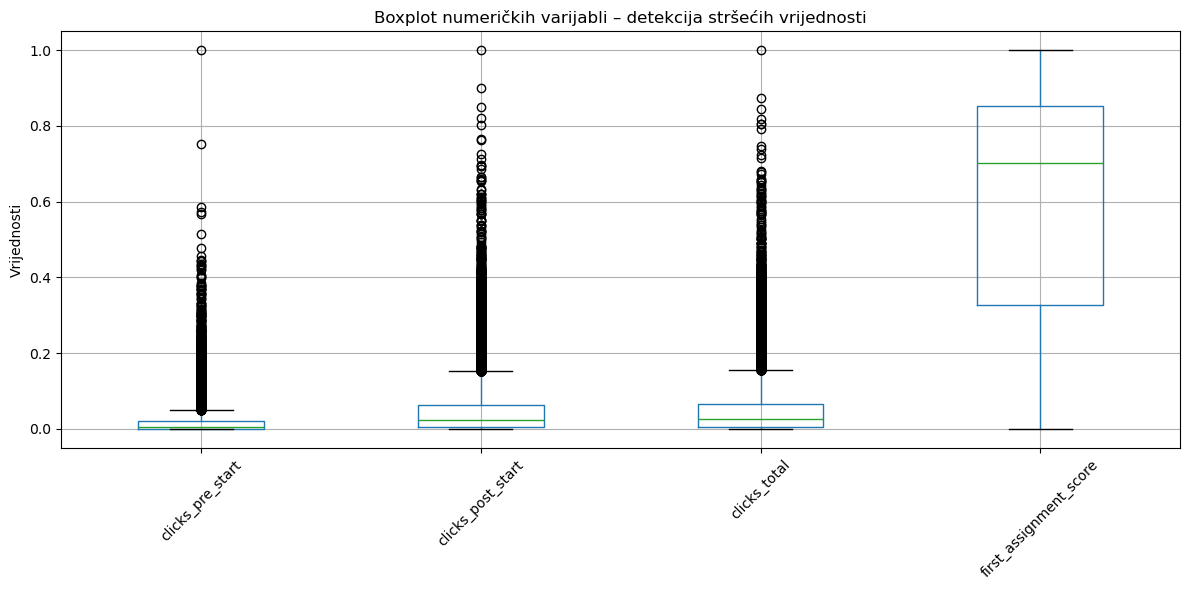

In [45]:
num_cols = [
    "clicks_pre_start",
    "clicks_post_start",
    "clicks_total",
    "first_assignment_score",
]

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Boxplot numeričkih varijabli – detekcija stršećih vrijednosti")
plt.ylabel("Vrijednosti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analizom grafova za varijable koje opisuju broj klikova u virtualnom okruženju (clicks_pre_start, clicks_post_start, clicks_total) uočene su stršeće vrijednosti, osobito na gornjem dijelu raspodjele. Ove vrijednosti predstavljaju manji broj izrazito aktivnih studenata s vrlo velikim brojem interakcija u sustavu. Budući da se radi o stvarnom ponašanju korisnika, a ne o pogreškama u podacima, stršeće vrijednosti nisu uklanjane iz skupa podataka. Njihova prisutnost dodatno naglašava heterogenost razine angažmana među studentima, što je u skladu s tematikom znanstvenog članka. <br>
Kod varijabli koje opisuju broj klikova uočena je velika koncentracija nultih vrijednosti (mnogi studenti nemaju zabilježenu aktivnost), zbog čega su kvartili Q1, medijan i Q3 blizu 0 te boxplot izgleda “spljošteno”.

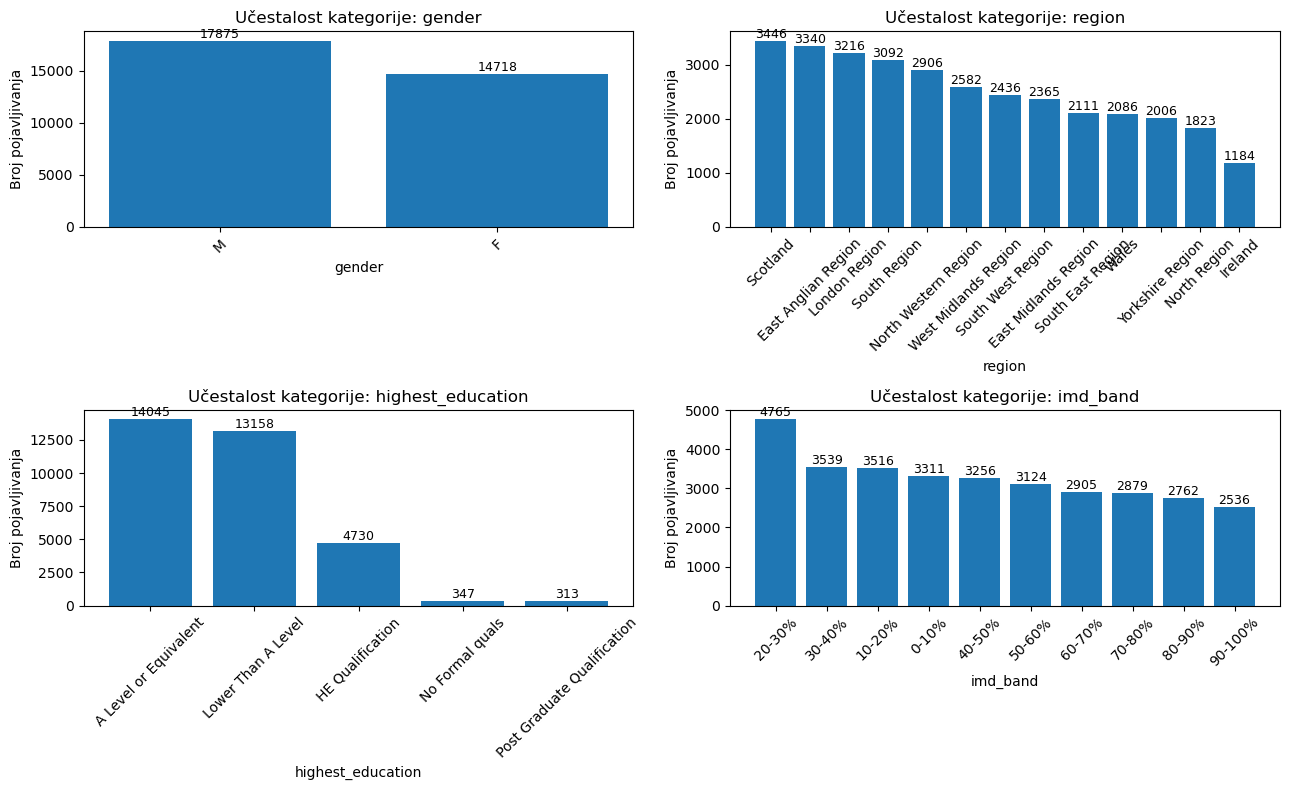

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

# 1 
ax = axes[0, 0]
cat_col = "gender"

counts = df[cat_col].value_counts()

ax.bar(counts.index.astype(str), counts.values)

ax.set_title(f"Učestalost kategorije: {cat_col}")
ax.set_xlabel(cat_col)
ax.set_ylabel("Broj pojavljivanja")
ax.tick_params(axis="x", rotation=45)

for x, y in enumerate(counts.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)

#2 
ax = axes[0, 1]
cat_col = "region"

counts = df[cat_col].value_counts()

ax.bar(counts.index.astype(str), counts.values)

ax.set_title(f"Učestalost kategorije: {cat_col}")
ax.set_xlabel(cat_col)
ax.set_ylabel("Broj pojavljivanja")
ax.tick_params(axis="x", rotation=45)

for x, y in enumerate(counts.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)
    

# 3
ax = axes[1, 0]
cat_col = "highest_education"

counts = df[cat_col].value_counts()

ax.bar(counts.index.astype(str), counts.values)

ax.set_title(f"Učestalost kategorije: {cat_col}")
ax.set_xlabel(cat_col)
ax.set_ylabel("Broj pojavljivanja")
ax.tick_params(axis="x", rotation=45)

for x, y in enumerate(counts.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)
    
# 4
ax = axes[1, 1]
cat_col = "imd_band"

counts = df[cat_col].value_counts()

ax.bar(counts.index.astype(str), counts.values)

ax.set_title(f"Učestalost kategorije: {cat_col}")
ax.set_xlabel(cat_col)
ax.set_ylabel("Broj pojavljivanja")
ax.tick_params(axis="x", rotation=45)

for x, y in enumerate(counts.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=9)
    
plt.tight_layout()
plt.show()

U prvom koraku provedena je deskriptivna analiza strukture skupa podataka. Prikazane su raspodjele osnovnih demografskih značajki studenata, uključujući spol, regiju, razinu obrazovanja i ekonomsku skupinu. Ovi grafovi omogućuju uvid u sastav uzorka te pokazuju koje su kategorije najzastupljenije u promatranom skupu podataka. U uzorku je prisutan relativno uravnotežen omjer muškaraca i žena (17 875 muškaraca i 14 718 žena). Većina studenata pripada nižim razinama obrazovanja, dok su varijable regije i ekonomske skupine (imd_band) raznolike, što ukazuje na heterogenost uzorka.

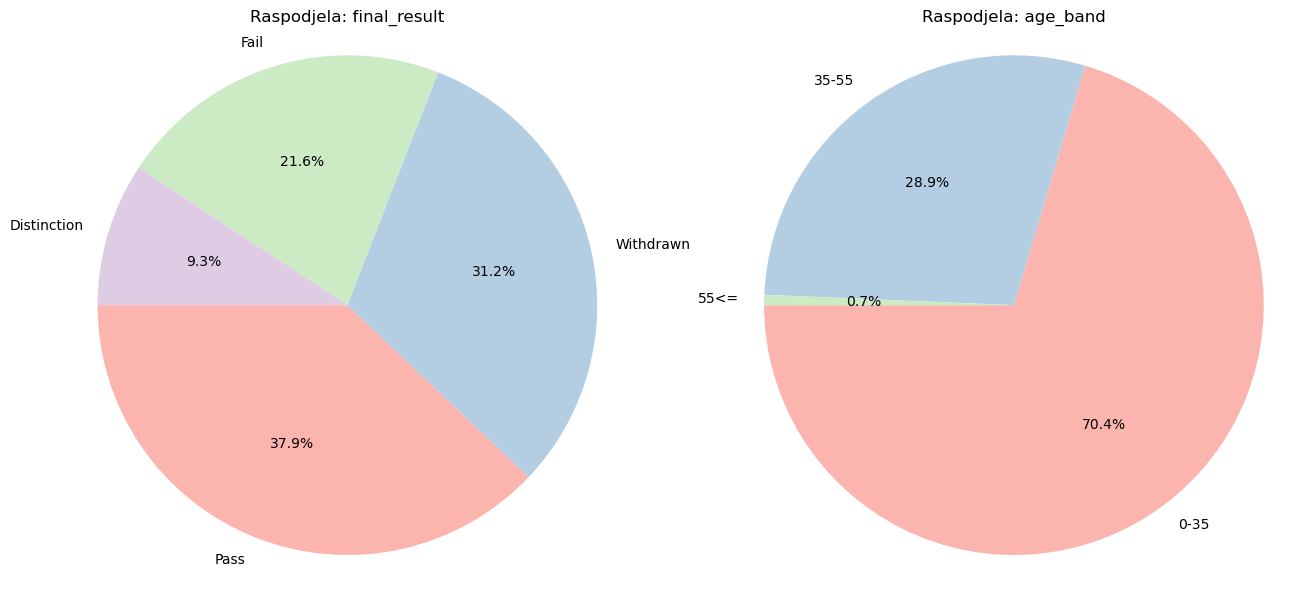

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# 1) final_result
ax = axes[0]
target_col = "final_result"
counts = df[target_col].value_counts()

ax.pie(
    counts.values,
    labels=counts.index.astype(str),
    autopct="%1.1f%%",
    startangle=180,
    colors=plt.cm.Pastel1.colors
)
ax.set_title(f"Raspodjela: {target_col}")
ax.axis("equal")

# 2) age_band
ax = axes[1]
target_col = "age_band"
counts = df[target_col].value_counts()

ax.pie(
    counts.values,
    labels=counts.index.astype(str),
    autopct="%1.1f%%",
    startangle=180,
    colors=plt.cm.Pastel1.colors
)
ax.set_title(f"Raspodjela: {target_col}")
ax.axis("equal")

plt.tight_layout()
plt.show()


Prije analize ranih pokazatelja uspjeha prikazana je raspodjela varijable koja opisuje dobne skupine studenata te raspodjela ciljne varijable final_result, koja označava konačni ishod studiranja. Ovi prikazi daju kontekst za daljnju analizu te pokazuju kako su studenti raspoređeni prema uspjehu, neuspjehu i odustajanju. Iz raspodjele konačnih ishoda vidljivo je da je omjer prolaznih i neprolaznih ishoda približno uravnotežen, pri čemu je ipak nešto veći udio studenata koji ne završe kolegij uspješno. Dodatno, raspodjela dobnih skupina pokazuje da je vrlo mali udio studenata starijih od 55 godina, dok većinu uzorka čine studenti mlađi od 35 godina.

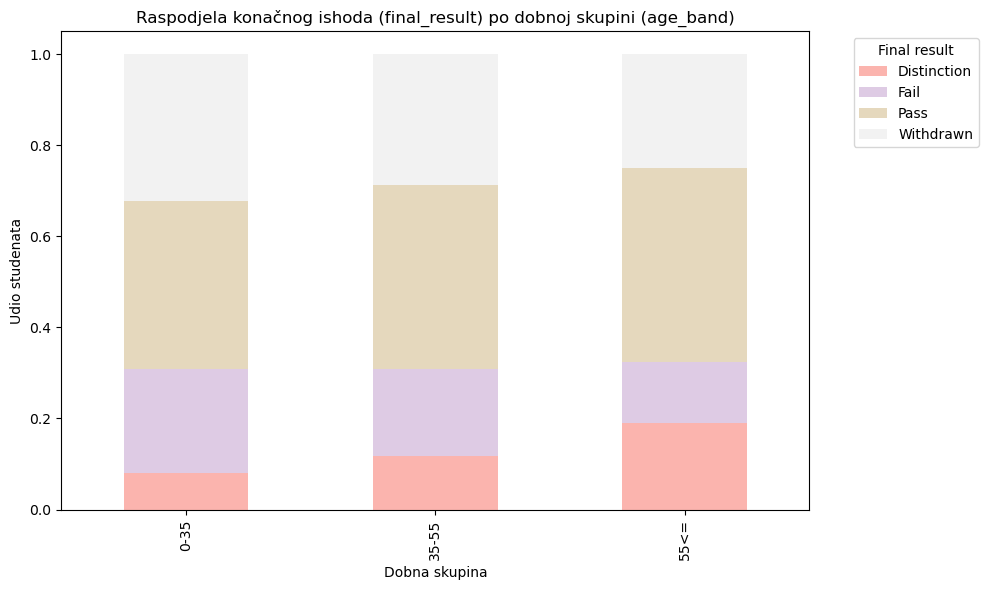

In [48]:
# age_band × final_result
ct = pd.crosstab(df["age_band"], df["final_result"], normalize="index")

# Plot
ax = ct.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Pastel1"
)

ax.set_title("Raspodjela konačnog ishoda (final_result) po dobnoj skupini (age_band)")
ax.set_xlabel("Dobna skupina")
ax.set_ylabel("Udio studenata")
ax.legend(title="Final result", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Dobna skupina studenata jedna je od informacija dostupnih već na početku kolegija. Analiza dobnih skupina može ukazati na potencijalne razlike u uspjehu, primjerice između mlađih i starijih studenata, te stoga predstavlja mogući rani demografski pokazatelj uspjeha. Najveći udio neuspješnih ishoda kao i ispisa zabilježen je kod studenata mlađih od 35 godina, što je očekivano s obzirom na to da ta dobna skupina čini najveći dio uzorka. S druge strane, studenti stariji od 55 godina imaju relativno veći udio ishoda Distinction, što može upućivati na veću motivaciju ili iskustvo, iako je riječ o manjoj skupini studenata.

In [49]:
edu_order = [
    "Lower Than A Level",
    "A Level or Equivalent",
    "HE Qualification",
    "Post Graduate Qualification"
]

df["highest_education"] = pd.Categorical(
    df["highest_education"],
    categories=edu_order,
    ordered=True
)

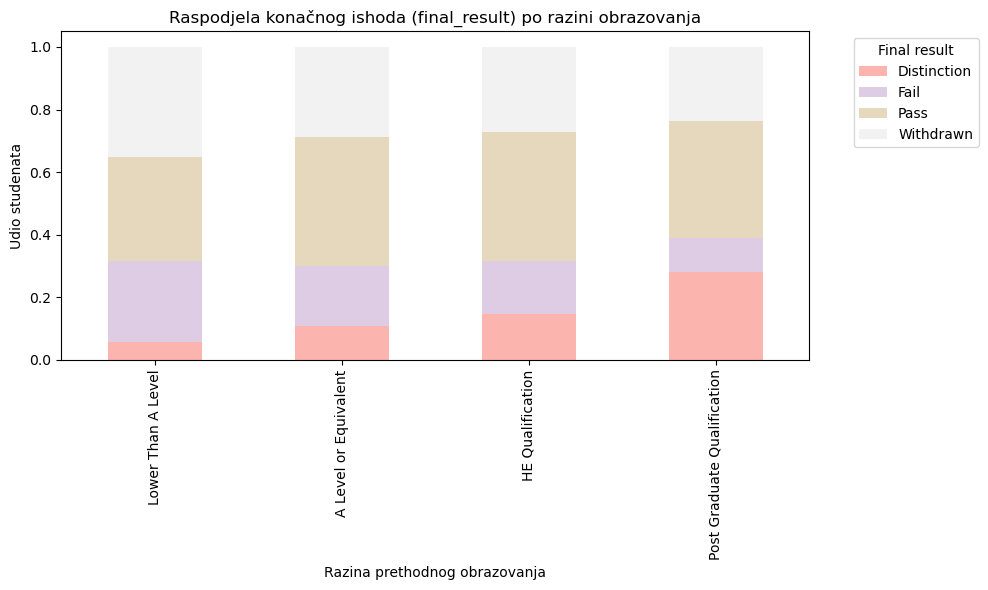

In [50]:
# highest_education × final_result
ct = pd.crosstab(df["highest_education"], df["final_result"], normalize="index")

# Plot
ax = ct.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Pastel1"
)

ax.set_title("Raspodjela konačnog ishoda (final_result) po razini obrazovanja")
ax.set_xlabel("Razina prethodnog obrazovanja")
ax.set_ylabel("Udio studenata")
ax.legend(title="Final result", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Razina prethodnog obrazovanja također je dostupna prije početka kolegija i može predstavljati indikator predznanja studenata. Analiza ove varijable omogućuje uvid u to postoji li potencijalna povezanost između ranije obrazovne pozadine i konačnog ishoda studiranja. <br>
Razina prethodnog obrazovanja tretirana je kao ordinalna kategorijska varijabla te je grafički prikazana u prirodnom redoslijedu od niže prema višoj razini obrazovanja. Promatrajući graf, uočava se da studenti s višim razinama obrazovanja u većem udjelu ostvaruju najbolje ishode (Distinction), dok studenti s najnižom razinom obrazovanja češće bilježe neuspješne ishode, uključujući pad kolegija ili ispisivanje. Ovi rezultati upućuju na potencijalnu povezanost predznanja i uspjeha, uz napomenu da se ne može zaključivati o uzročnosti.

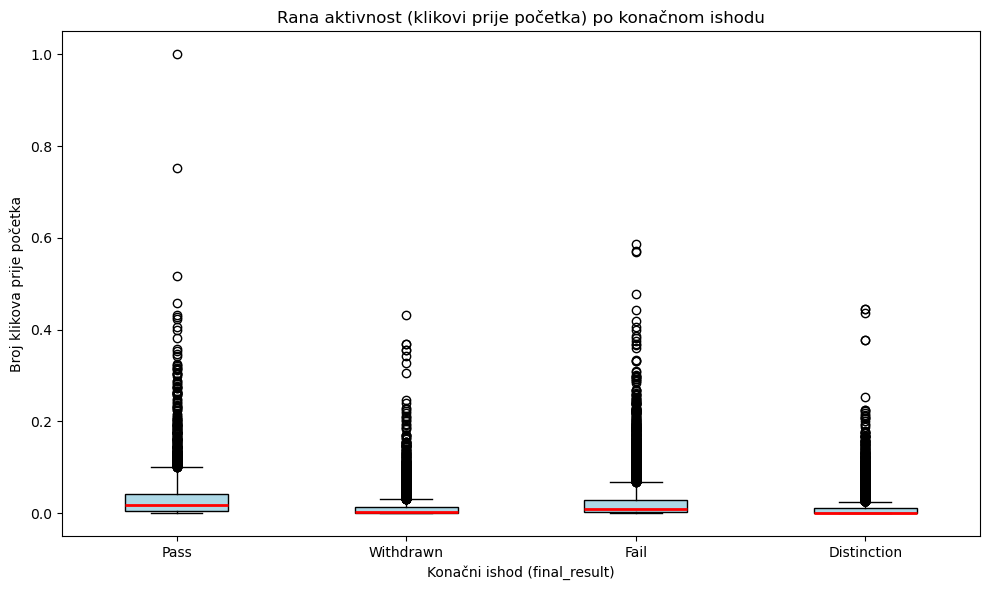

In [51]:

num_col = "clicks_pre_start"
group_col = "final_result"

data = df[[group_col, num_col]]

grouped = [
    group[num_col].values
    for _, group in data.groupby(group_col)
]

labels = data[group_col].unique()

plt.figure(figsize=(10, 6))

plt.boxplot(
    grouped,
    tick_labels=labels,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="black"),
    medianprops=dict(color="red", linewidth=2)
)

plt.title("Rana aktivnost (klikovi prije početka) po konačnom ishodu")
plt.xlabel("Konačni ishod (final_result)")
plt.ylabel("Broj klikova prije početka")

plt.tight_layout()
plt.show()


Posebna pažnja posvećena je aktivnosti studenata u virtualnom okruženju prije početka kolegija, mjerene brojem klikova. Ova varijabla predstavlja rani ponašajni pokazatelj angažmana, koji je prema znanstvenom članku jedan od ključnih ranih signala uspjeha. <br>
Graf prikazuje raspodjelu broja klikova u virtualnom okruženju prije početka kolegija (clicks_pre_start) po konačnom ishodu studiranja. Budući da se ova aktivnost događa prije početka nastave, ona predstavlja rani ponašajni pokazatelj angažmana studenata. Uočene razlike među skupinama upućuju na to da rani angažman može biti povezan s kasnijim uspjehom, što je u skladu s nalazima znanstvenog članka.

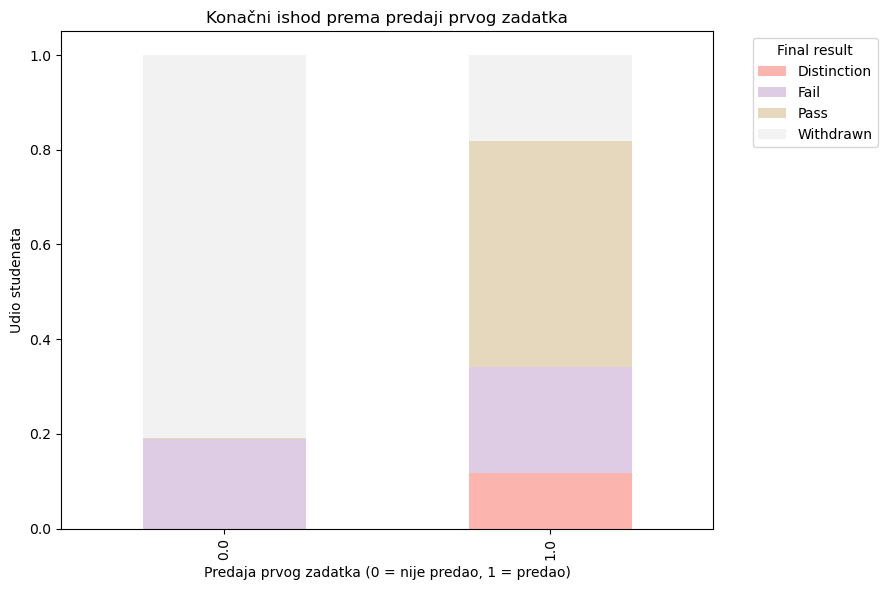

In [52]:
ct = pd.crosstab(
    df["submitted_first_assignment"],
    df["final_result"],
    normalize="index"
)

ax = ct.plot(
    kind="bar",
    stacked=True,
    figsize=(9, 6),
    colormap="Pastel1"
)

ax.set_title("Konačni ishod prema predaji prvog zadatka")
ax.set_xlabel("Predaja prvog zadatka (0 = nije predao, 1 = predao)")
ax.set_ylabel("Udio studenata")
ax.legend(title="Final result", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Jedan od najvažnijih ranih pokazatelja uspjeha u znanstvenom članku jest predaja prvog zadatka. U ovom skupu podataka analizirano je razlikuju li se konačni ishodi studenata koji su predali prvi zadatak od onih koji ga nisu predali. <br>
Graf prikazuje raspodjelu konačnih ishoda studiranja ovisno o tome jesu li studenti predali prvi zadatak. Predaja prvog zadatka predstavlja jedan od najranijih ponašajnih pokazatelja uspjeha, budući da se događa vrlo rano u tijeku kolegija. Vidljive razlike između skupina dodatno naglašavaju važnost ranog sudjelovanja u nastavnim aktivnostima. Važno je primijetiti da u promatranom skupu podataka ne postoji niti jedan student koji nije predao prvi zadatak, a ostvario je najbolji ishod studiranja (Distinction). Također, broj studenata koji su položili kolegij bez predaje prvog zadatka iznimno je malen.

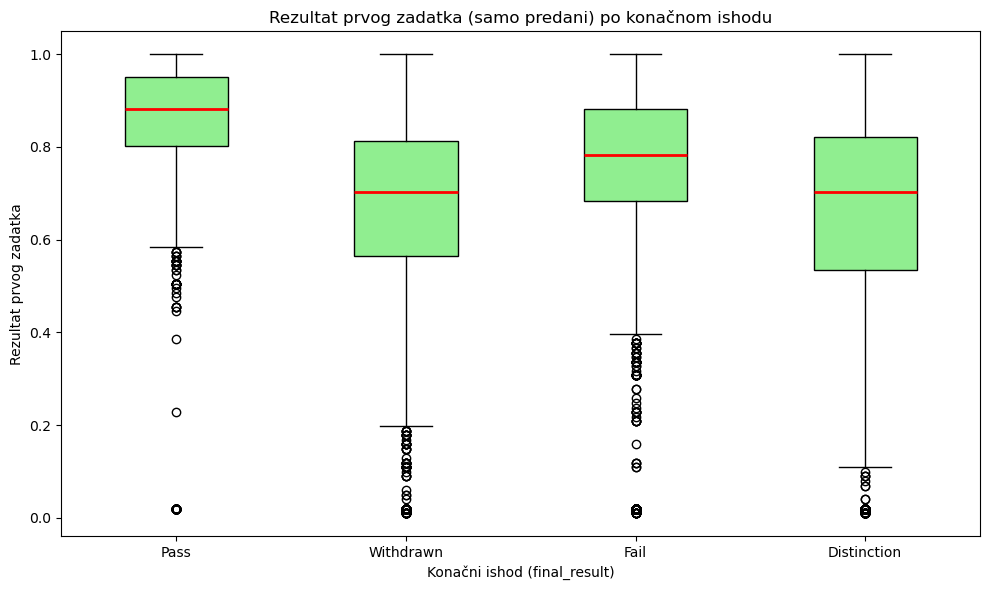

In [53]:

num_col = "first_assignment_score"
group_col = "final_result"

# Uzimamo samo studente koji su predali prvi zadatak
data = df[df["submitted_first_assignment"] == 1][[group_col, num_col]]

grouped = [
    group[num_col].values
    for _, group in data.groupby(group_col)
]

labels = data[group_col].unique()

plt.figure(figsize=(10, 6))

plt.boxplot(
    grouped,
    tick_labels=labels,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", color="black"),
    medianprops=dict(color="red", linewidth=2)
)

plt.title("Rezultat prvog zadatka (samo predani) po konačnom ishodu")
plt.xlabel("Konačni ishod (final_result)")
plt.ylabel("Rezultat prvog zadatka")

plt.tight_layout()
plt.show()


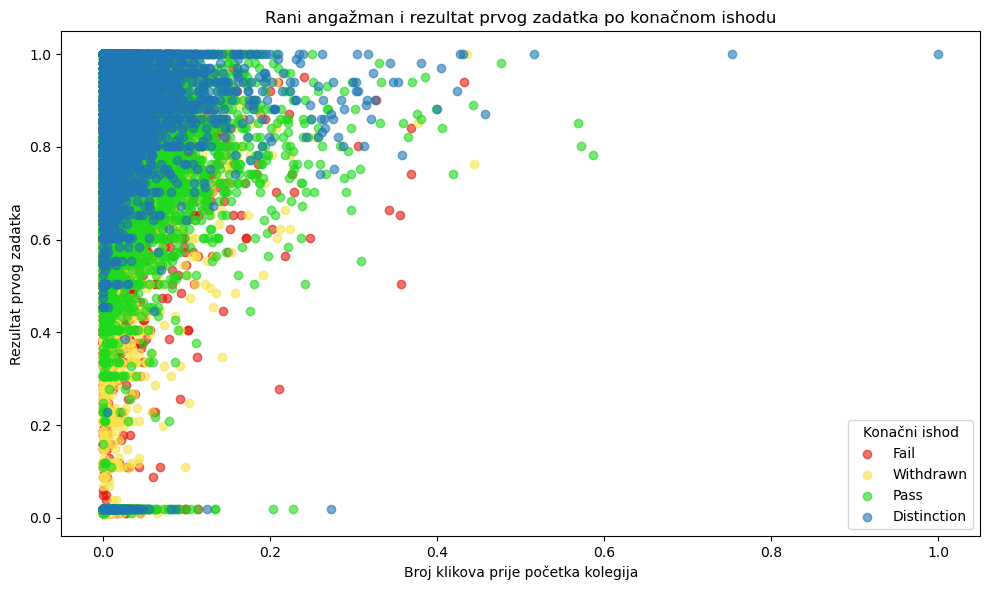

In [54]:
x_col = "clicks_pre_start"
y_col = "first_assignment_score"
color_col = "final_result"

# Uzmi samo studente koji su predali prvi zadatak
subset = df[df["submitted_first_assignment"] == 1][
    [x_col, y_col, color_col]
]

# Redoslijed kategorija (smislen za interpretaciju)
categories_order = ["Fail", "Withdrawn", "Pass", "Distinction"]

# Boje po ishodu
colors = ["#e2170c", "#f8e34b", "#20d81d", "#1f77b4"]
color_map = dict(zip(categories_order, colors))

plt.figure(figsize=(10, 6))

for cat in categories_order:
    data = subset[subset[color_col] == cat]
    plt.scatter(
        data[x_col],
        data[y_col],
        color=color_map[cat],
        alpha=0.6,
        label=cat
    )

plt.title("Rani angažman i rezultat prvog zadatka po konačnom ishodu")
plt.xlabel("Broj klikova prije početka kolegija")
plt.ylabel("Rezultat prvog zadatka")
plt.legend(title="Konačni ishod")
plt.tight_layout()
plt.show()


Za studente koji su predali prvi zadatak analizirana je i ostvarena ocjena. Rezultat prvog zadatka predstavlja ranu kvantitativnu mjeru uspješnosti te može dodatno razlikovati studente koji će kasnije uspješno završiti kolegij od onih koji neće. Na grafu su uočljive stršeće vrijednosti, koje su prethodno adresirane kao očekivane i normalne u kontekstu ovakvih podataka. Vidljivo je da studenti koji su uspješno položili kolegij imaju najveći medijan rezultata prvog zadatka. Zanimljivo je također primijetiti da studenti koji su kasnije odustali od kolegija u prosjeku ostvaruju bolje rezultate prvog zadatka u odnosu na studente koji su pali kolegij, što može upućivati na razlike u razlozima ispisa.

U ovom dijelu projekta provedena je detaljna deskriptivna analiza i vizualizacija podataka korištenih u znanstvenom članku. Analiza je obuhvatila pripremu skupa podataka, obradu nedostajućih i stršećih vrijednosti te istraživanje strukture i raspodjele relevantnih varijabli. Poseban naglasak stavljen je na rane demografske i ponašajne pokazatelje uspjeha studenata, uključujući dob, razinu prethodnog obrazovanja, ranu aktivnost u virtualnom okruženju za učenje te predaju i rezultat prvog zadatka.<br>

Provedena deskriptivna analiza pokazuje da se razlike u konačnim ishodima studiranja mogu uočiti već u ranoj fazi kolegija. Demografske značajke poput dobi i razine prethodnog obrazovanja pokazuju određene obrasce povezane s uspjehom, dok se ponašajni pokazatelji, osobito predaja i rezultat prvog zadatka te razina rane aktivnosti, ističu kao posebno informativni rani indikatori uspjeha. Ovi nalazi u skladu su s ciljem znanstvenog članka koji se bavi ranom predikcijom studentskog uspjeha.<br>

Dobiveni uvidi pružaju temelj za daljnju analizu i odabir značajki te će poslužiti kao podloga za izgradnju modela za predviđanje studentskog uspjeha u sljedećem dijelu projekta.